# Quantum Prisoner's Dilemma #

In [4]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from tabulate import tabulate

Initializing states

In [5]:
C = np.array([1,0])
D = np.array([0,1])

CC = np.kron(C,C)
DD = np.kron(D,D)

In [6]:
# To find conjugate transpose
def H(j):
    return j.conjugate().T

### Initializing operator $\hat{J}$

In [7]:
def J(g):
    j = np.zeros((4,4), dtype = complex)
    for i in range(4):
        j[i][i] = cos(g/2)
    j[0][3] = -1j*sin(g/2)
    j[1][2] = 1j*sin(g/2)
    j[2][1] = 1j*sin(g/2)
    j[3][0] = -1j*sin(g/2)
    return j

### Strategy Operator $\hat{U}(\theta, \Phi)$

In [8]:
def U(theta, phi):
    u = np.array([[np.exp(1j*phi)*cos(theta/2), sin(theta/2)], 
                  [-sin(theta/2), np.exp(-1j*phi)*cos(theta/2)]])
    return u

### final state $\mid\psi_f\rangle$

In [9]:
def Psi(J, Ua, Ub):
    psi = np.matmul(np.matmul(H(J), np.kron(Ua,Ub)),np.matmul(J, CC))
    return psi

### Expected payoff ($)

In [10]:
def expected_payoff(p, psi):
    a, b= 0, 0
    for i in range(len(p[0])):
        a += p[0][i]*(abs(psi[i]))**2
        b += p[1][i]*(abs(psi[i]))**2
    return a, b

In [11]:
# For plotting

def payoff_plot(gamma, p, x, y):
    
    j = J(gamma)
    Ua = U(x*pi,0) if x >= 0 else U(0,-x*pi/2)
    Ub = U(y*pi,0) if y >= 0 else U(0,-y*pi/2)
    psi = Psi(j,Ua,Ub)
    a, b = expected_payoff(p, psi)
    return a

### Payoff matrix

In [12]:
payoff = np.array([[3, 0, 5, 1],[3, 5, 0, 1]])


## Alice's payoff in a separable game ($\gamma$ = 0)

In [13]:

x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)
def alice(x, y):

    s = payoff_plot(0, payoff, x, y)
    return s
v = np.vectorize(alice)
X, Y = np.meshgrid(x, y)
Z = v(X, Y)


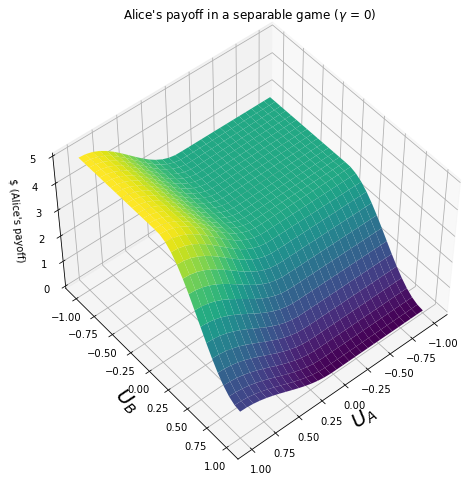

In [14]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("$U_A$", fontsize=20)
ax.set_ylabel("$U_B$", fontsize=20)
ax.set_zlabel("$ (Alice's payoff)")
ax.set_title("Alice's payoff in a separable game ($\gamma$ = 0)")
ax.view_init(50, 50)

## Alice's payoff in a maximally entangled ($\gamma = \frac{\pi}{2}$)

In [15]:

x = np.linspace(-1, 1, 30)
y = np.linspace(-1, 1, 30)
def alice(x, y):

    s = payoff_plot(pi/2, payoff, x, y)
    return s
v = np.vectorize(alice)
X, Y = np.meshgrid(x, y)
Z = v(X, Y)


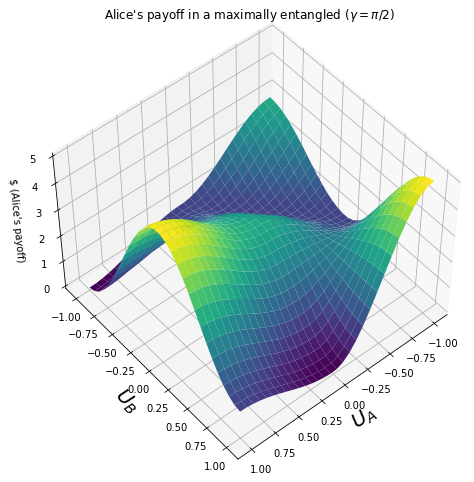

In [16]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("$U_A$", fontsize=20)
ax.set_ylabel("$U_B$", fontsize=20)
ax.set_zlabel("$ (Alice's payoff)")
ax.set_title("Alice's payoff in a maximally entangled ($\gamma = \pi/2$)")
ax.view_init(50, 50)

# RANDOM MIXED STRATEGIES IN QPD


In [17]:
def Psi_dense(J, Ua, Ub):
    rhoi = np.outer(CC,CC)
    rho1 = np.matmul(J, np.matmul(rhoi, H(J)))
    rho2 = np.matmul(np.kron(Ua, Ub), np.matmul(rho1, H(np.kron(Ua, Ub))))
    rhof = np.matmul(J, np.matmul(rho2, H(J)))
    return rhof

# The payoff operator 
def payoff_op(p):
    C = np.array([1,0])
    D = np.array([0,1])
    basis = {
        'b0' : np.kron(C,C),
        'b1' : np.kron(C,D),
        'b2' : np.kron(D,C),
        'b3' : np.kron(D,D)
    }
    pa, pb = 0, 0
    for i in range(len(p[0])):
        pa += p[0][i]*np.outer(basis['b'+str(i)], basis['b'+str(i)])
        pb += p[1][i]*np.outer(basis['b'+str(i)], basis['b'+str(i)]) 
    return pa, pb

# expected payoff for mixed strategies with probability p and q 
def mixed_payoff(j, ua1, ua2, ub1, ub2, p, q, payoff):
    rho = p*q*Psi_dense(j, ua1, ub1) + p*(1-q)*Psi_dense(j, ua1, ub2) + (1-p)*q*Psi_dense(j, ua2, ub1) + (1-p)*(1-q)*Psi_dense(j, ua2, ub2) 
    P = payoff_op(payoff)
    a = np.trace(np.matmul(P[0],rho))
    b = np.trace(np.matmul(P[1],rho))
    return a.real, b.real

In [18]:
def QPD_mixed_payoff(p, q):
    i = U(0,0)
    x = U(pi, 0)
    s, m = mixed_payoff(J(pi/2), i, x, i, x, p, q, payoff)
    return s

In [19]:

p = np.linspace(0, 1, 30)
q = np.linspace(0, 1, 30)

v = np.vectorize(QPD_mixed_payoff)
X, Y = np.meshgrid(p, q)
Z = v(X, Y)


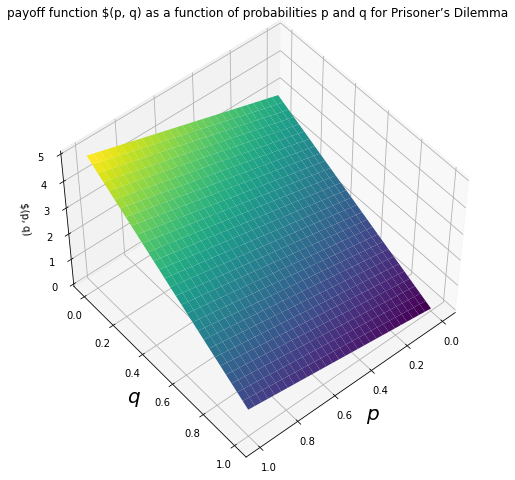

In [20]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("$p$", fontsize=20)
ax.set_ylabel("$q$", fontsize=20)
ax.set_zlabel("$(p, q)")
ax.set_title("payoff function $(p, q) as a function of probabilities p and q for Prisoner’s Dilemma")
ax.view_init(50, 50)
plt.show()

## Nash Equilibrium estimator

In [63]:
# pretty bad un-optimized algorithm since this take an exponential time
# need to be optimized
def NE_estimate(a1, a2, b1, b2, payoff):
    p = np.linspace(0, 1, 10)
    q = np.linspace(0, 1, 10)
    Pn, Qn = [0], [0]
    for pn in p:
        for qn in q:
            for pt in p:
                for qt in q:
                    an, bn = mixed_payoff(J(pi/2), a1, a2, b1, b2, pn, qn, payoff)
                    a, b = mixed_payoff(J(pi/2), a1, a2, b1, b2, pt, qt, payoff)
                    if an >= a and bn >= b and pn not in Pn and qn not in Qn:
                        Pn.append(pn)
                        Qn.append(qn)
    return Pn, Qn 

In [62]:
i = U(0,0)
x = U(pi, 0)
NE_estimate(i, x, i, x, payoff)

([0,
  0.1111111111111111,
  0.2222222222222222,
  0.3333333333333333,
  0.4444444444444444,
  0.5555555555555556,
  0.6666666666666666,
  0.7777777777777777,
  0.8888888888888888,
  1.0],
 [0,
  0.1111111111111111,
  0.2222222222222222,
  0.3333333333333333,
  0.4444444444444444,
  0.5555555555555556,
  0.6666666666666666,
  0.7777777777777777,
  0.8888888888888888,
  1.0])

Thus, NE occurs in mixed HD game for all p and q such that p = q

## The maximum payoff in NE and comparing with the classical mixed HD game

### for no entaglement $\gamma$ = 0

In [58]:
def QPD_mixed_payoff(p):
    i = U(0,0)
    x = U(pi, 0)
    s, m = mixed_payoff(J(0), i, x, i, x, p, p, payoff)
    return s.real
p = np.linspace(0, 1, 50)
z = []
for l in p:
    z.append(QPD_mixed_payoff(l))
pmax =0
for l in p:
    if QPD_mixed_payoff(l) == max(z):
        pmax = l
print('The maximum payoff is', max(z), 'at p =', pmax)

The maximum payoff is 3.0 at p = 1.0


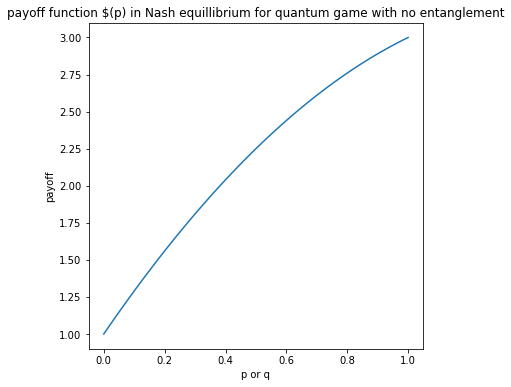

In [59]:
plt.figure(figsize=(6, 6))

plt.plot(p, z)
plt.xlabel('p or q')
plt.ylabel('payoff')
plt.title("payoff function $(p) in Nash equillibrium for quantum game with no entanglement")
plt.show()

### for maximal entaglement $\gamma$ = $\pi$/2

In [75]:
def QPD_mixed_payoff(p):
    i = U(0,0)
    x = U(pi, 0)
    s, m = mixed_payoff(J(pi/2), i, x, i, x, p, p, payoff)
    return s.real
p = np.linspace(0, 1, 50)
z = []
for l in p:
    z.append(QPD_mixed_payoff(l))
pmax =0
for l in p:
    if QPD_mixed_payoff(l) == max(z):
        pmax = l
print('The maximum payoff is', max(z), 'at p =', pmax)

The maximum payoff is 3.0 at p = 0.0


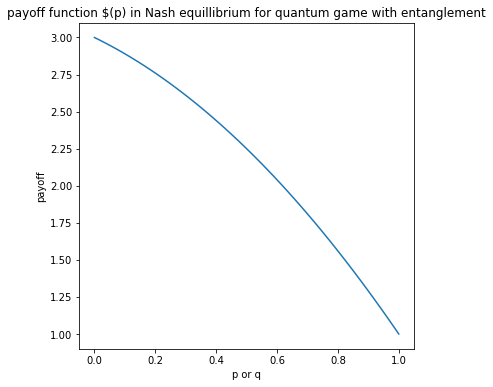

In [76]:
plt.figure(figsize=(6, 6))

plt.plot(p, z)
plt.xlabel('p or q')
plt.ylabel('payoff')
plt.title("payoff function $(p) in Nash equillibrium for quantum game with entanglement")
plt.show()

### classical PD game

In [66]:
def classical_payoff(po, p, q):
    pff = np.array([[po[0], po[1]], [po[2], po[3]]])
    pm = np.array([p, 1 -p])
    qm = np.array([q, 1 -q])
    return np.matmul(pm.T, np.matmul(pff, qm))

In [73]:
p = np.linspace(0, 1, 50)
z = []
for l in p:
    z.append(classical_payoff(payoff[0],l, l))
pmax =0
for l in p:
    if classical_payoff(payoff[0],l, l) == max(z):
        cpmax = l
print('The maximum payoff is', max(z), 'at p =', cpmax)

The maximum payoff is 3.0 at p = 1.0


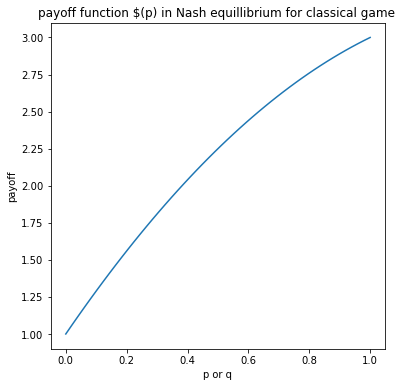

In [74]:
plt.figure(figsize=(6, 6))

plt.plot(p, z)
plt.xlabel('p or q')
plt.ylabel('payoff')
plt.title("payoff function $(p) in Nash equillibrium for classical game ")
plt.show()

### Payoff Table

In [77]:
def payoff_table(po, pm):
    def ab(A, B):
        psi = Psi(J(pi/2),A,B)
        al, bo = expected_payoff(po, psi)
        return round(al,1), round(bo,1)
    def m(a1, a2, b1, b2, p, q):
        al, bo = mixed_payoff(J(pi/2), a1, a2, b1, b2, p, q, po)
        return round(al.real,1), round(bo.real,1)
    C = U(0,0)
    D = U(pi,0)
    Q = U(0,pi/2)
    

    table = [["",'','C','D', 'Q', 'R'],['',"C",str(ab(C, C)),str(ab(C, D)), str(ab(C, Q)), m(C, D, C, D, 1, pm)],
             ['Alice',"D",str(ab(D, C)),str(ab(D, D)), str(ab(D, Q)),m(C, D, C, D, 0, pm)],['',"Q",str(ab(Q, C)),str(ab(Q, D)), str(ab(Q, Q)), m(Q, D, C, D, 1, pm)],
            ['','R',m(C, D, C, D, pm, 1), m(C, D, C, D, pm, 0), m(C, D, Q, D, pm, 1), m(C, D, C, D, pm, pm)]]
    headers = ["Bob",'']
    print(tabulate(table, headers, tablefmt="pretty"))
    
payoff_table(payoff, pmax)

+-------+---+------------+------------+------------+------------+
|       |   |            |            |    Bob     |            |
+-------+---+------------+------------+------------+------------+
|       |   |     C      |     D      |     Q      |     R      |
|       | C | (3.0, 3.0) | (0.0, 5.0) | (1.0, 1.0) | (5.0, 0.0) |
| Alice | D | (5.0, 0.0) | (1.0, 1.0) | (0.0, 5.0) | (3.0, 3.0) |
|       | Q | (1.0, 1.0) | (5.0, 0.0) | (3.0, 3.0) | (0.0, 5.0) |
|       | R | (0.0, 5.0) | (3.0, 3.0) | (5.0, 0.0) | (3.0, 3.0) |
+-------+---+------------+------------+------------+------------+


# QUANTUM HAWK-DOVE GAME


### payoff matrix

In [21]:
def HD_payoff_matrix(v, i, d):
    return np.array([[(v - i)/2, v, 0, v/2 -d],[(v - i)/2, 0, v, v/2 -d]])

In [22]:
HD = HD_payoff_matrix(50, 100, 10)
HD

array([[-25.,  50.,   0.,  15.],
       [-25.,   0.,  50.,  15.]])

In [23]:
def QHD_mixed_payoff(p, q):
    i = U(0,0)
    x = U(pi, 0)
    s, m = mixed_payoff(J(pi/2), i, x, i, x, p, q, HD)
    return s.real

In [24]:
p = np.linspace(0, 1, 30)
q = np.linspace(0, 1, 30)

v = np.vectorize(QHD_mixed_payoff)
X, Y = np.meshgrid(p, q)
Z = v(X, Y)

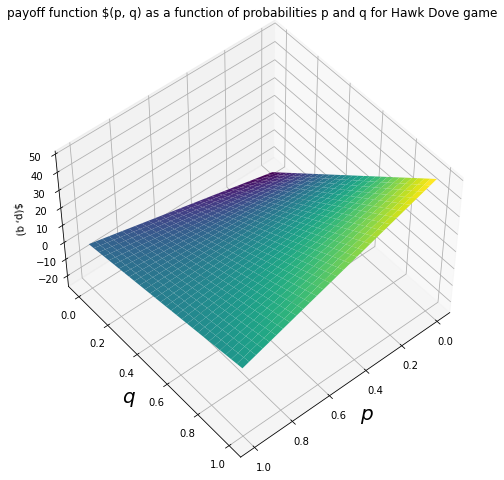

In [25]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel("$p$", fontsize=20)
ax.set_ylabel("$q$", fontsize=20)
ax.set_zlabel("$(p, q)")
ax.set_title("payoff function $(p, q) as a function of probabilities p and q for Hawk Dove game")
ax.view_init(50, 50)
plt.show()

### NE for HD game

In [60]:
i = U(0,0)
x = U(pi, 0)
NE_estimate(i, x, i, x, HD)

([0,
  0.1111111111111111,
  0.2222222222222222,
  0.3333333333333333,
  0.4444444444444444,
  0.5555555555555556,
  0.6666666666666666,
  0.7777777777777777,
  0.8888888888888888,
  1.0],
 [0,
  0.1111111111111111,
  0.2222222222222222,
  0.3333333333333333,
  0.4444444444444444,
  0.5555555555555556,
  0.6666666666666666,
  0.7777777777777777,
  0.8888888888888888,
  1.0])

Thus, NE occurs in mixed HD game for all p and q such that p = q

## The maximum payoff in NE and comparing with the classical mixed HD game

### for no entaglement $\gamma$ = 0

In [40]:
def QHD_mixed_payoff(p):
    i = U(0,0)
    x = U(pi, 0)
    s, m = mixed_payoff(J(0), i, x, i, x, p, p, HD)
    return s.real
p = np.linspace(0, 1, 50)
z = []
for l in p:
    z.append(QHD_mixed_payoff(l))
pmax =0
for l in p:
    if QHD_mixed_payoff(l) == max(z):
        pmax = l
print('The maximum payoff is', max(z), 'at p =', pmax)

The maximum payoff is 16.66597251145356 at p = 0.16326530612244897


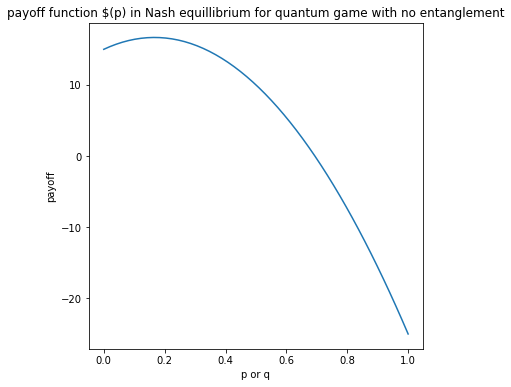

In [55]:
plt.figure(figsize=(6, 6))

plt.plot(p, z)
plt.xlabel('p or q')
plt.ylabel('payoff')
plt.title("payoff function $(p) in Nash equillibrium for quantum game with no entanglement")
plt.show()

### for maximal entaglement $\gamma$ = $\pi$/2

In [80]:
def QHD_mixed_payoff(p):
    i = U(0,0)
    x = U(pi, 0)
    s, m = mixed_payoff(J(pi/2), i, x, i, x, p, p, HD)
    return s.real
p = np.linspace(0, 1, 50)
z = []
for l in p:
    z.append(QHD_mixed_payoff(l))
pmax =0
for l in p:
    if QHD_mixed_payoff(l) == max(z):
        pmax = l
print('The maximum payoff is', max(z), 'at p =', pmax)

The maximum payoff is 16.66597251145356 at p = 0.836734693877551


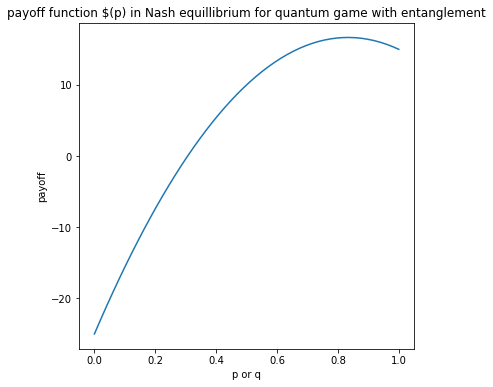

In [81]:
plt.figure(figsize=(6, 6))

plt.plot(p, z)
plt.xlabel('p or q')
plt.ylabel('payoff')
plt.title("payoff function $(p) in Nash equillibrium for quantum game with entanglement")
plt.show()

### classical HD game

In [78]:
p = np.linspace(0, 1, 50)
z = []
for l in p:
    z.append(classical_payoff(HD[0],l, l))
pmax =0
for l in p:
    if classical_payoff(HD[0],l, l) == max(z):
        cpmax = l
print('The maximum payoff is', max(z), 'at p =', cpmax)

The maximum payoff is 16.66597251145356 at p = 0.16326530612244897


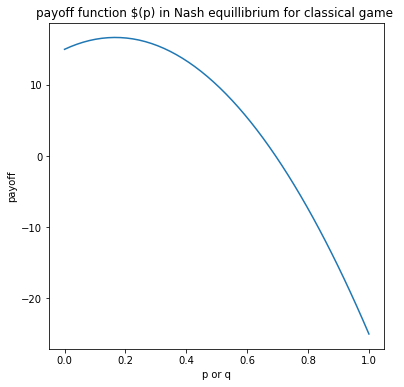

In [79]:
plt.figure(figsize=(6, 6))

plt.plot(p, z)
plt.xlabel('p or q')
plt.ylabel('payoff')
plt.title("payoff function $(p) in Nash equillibrium for classical game ")
plt.show()

#### Thus, we can see our result for un-entangled Quantum HD game and the classical HD game are the same
#### But we have a different but symmetric result for entangled HD game

### Payoff Table

In [82]:
payoff_table(HD, pmax)

+-------+---+----------------+--------------+----------------+----------------+
|       |   |                |              |      Bob       |                |
+-------+---+----------------+--------------+----------------+----------------+
|       |   |       C        |      D       |       Q        |       R        |
|       | C | (-25.0, -25.0) | (50.0, -0.0) |  (15.0, 15.0)  |  (12.6, 20.7)  |
| Alice | D |  (-0.0, 50.0)  | (15.0, 15.0) |  (50.0, 0.0)   |  (37.8, -4.1)  |
|       | Q |  (15.0, 15.0)  | (0.0, 50.0)  | (-25.0, -25.0) | (-12.8, -20.9) |
|       | R |  (20.7, 12.6)  | (-4.1, 37.8) | (-20.9, -12.8) |  (16.7, 16.7)  |
+-------+---+----------------+--------------+----------------+----------------+


In [83]:
# p = np.linspace(0, 1, 50)
# q = np.linspace(0, 1, 50)
# xp, yq = [], []
# for i in p:
#     if QHD_mixed_payoff(i,i)>15:
#         xp.append(i)
#         yq.append(i)

# plt.figure(figsize=(5, 5))
# plt.axis('equal')
# plt.scatter(xp, yq)
# plt.show()